## Week 3

### Exercise:

- Join kaggle.com and choose a real-world dataset. (This is part of your homework, try to do some research on Kaggle.)
- Download the data of your choice.
- Practice data cleaning and preprocessing, handle missing values, outliers etc.
- Explore the basic statistics with pandas methods.
- Create visualizations to understand the distribution of variables.
- Identify correlations between variables using correlation matrices and/or heatmaps.
- Derive insights from your analysis. What interesting patterns or trends did you discover?

### Notes:
- The goal is to gain insights into the data and present your findings through meaningful visualizations.
- Document your analysis and include code comments to explain each step of the analysis.
- Create visualizations with clear labels and titles.
- Summarize your findings in a informative manner.


### Örnek:

- Kaggle.com'a katılın ve gerçek dünyadan bir veri kümesi seçin. (Bu ödevinizin bir parçası, Kaggle hakkında biraz araştırma yapmaya çalışın.)
- İstediğiniz verileri indirin.
- Veri temizleme ve ön işleme alıştırmaları yapın, eksik değerleri, aykırı değerleri vb. ele alın.
- Pandas yöntemleriyle temel istatistikleri keşfedin.
- Değişkenlerin dağılımını anlamak için görselleştirmeler oluşturun.
- Korelasyon matrislerini ve/veya ısı haritalarını kullanarak değişkenler arasındaki korelasyonları belirleyin.
- Analizinizden içgörüler elde edin. Hangi ilginç kalıpları veya eğilimleri keşfettiniz?

### Notlar:
- Amaç, verilere ilişkin içgörüler elde etmek ve bulgularınızı anlamlı görselleştirmelerle sunmaktır.
- Analizinizi belgeleyin ve analizin her adımını açıklamak için kod yorumlarını ekleyin.
- Anlaşılır etiketler ve başlıklarla görselleştirmeler oluşturun.
- Bulgularınızı bilgilendirici bir şekilde özetleyin.

### Solution:

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Pima Indians Diabetes Database veri çerçevesini kullanarak veri çerçevesinde ön işlemler yapacağız ve veri görselleştirme ile veri çerçevizi daha iyi tanıyacağız.

* SkinThicknessTriceps :skin fold thickness (mm) /n

* Insulin: 2-Hour serum insulin (mu U/ml)

* BMI: Body mass index (weight in kg/(height in m)^2)

* DiabetesPedigreeFunction :Diabetes pedigree function

* Age:Age (years)

* Outcome :Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_url = "../data/week-3-kaggle-data/"
dataset_url = base_url + "diabetes.csv"

#### **IMPORTING DATASETS**

In [3]:
df = pd.read_csv(dataset_url)

#### Veri Seti Hikayesi ve Yapısının İncelenmesi

Veri çerçevemizin ilk 10 gözlemini görüntüleyelim.

In [4]:
df.head(10) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [6]:
df.shape

(768, 9)

Veri çerçevemizde kaç adet eksik değer olduğunu görüntüleyelim.

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Yukarıda anlaşıldığı gibi veri çerçevemizde eksik değerin yok olduğunu görüyoruz. Fakat veriyi incelediğimizde aslında eksik değerlere sahip olduğumuzu göreceğiz . Şimdi veri çerçevimizi biraz daha inceleyelim.

Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Yukarıda veri çerçevemizin temel istatistik değerlerin ulaşıyoruz. Gözlem sayısı, gözlemlerin ortalaması, gözlemlerin standart sapması,gözlemlerin minumum ve maximum değerlerini, medyan değeri gibi değerleri görüntüleyebiliyoruz. İstatistiklere bakarak yorum yaptığımızda çoğu özniteliğin minumum değerinin '0' olduğu görülür. Veri çerçevemizi daha iyi anlayabilmek için yapılan araştırmalarda bu değerlerin '0' değeri almasının yanlış olduğunu görüyoruz. Veride eksik bilgiler yerine '0' değernin yazıldığını anlayabiliyoruz. Ortalama ve standart sapmalara bakıldığında bazı özniteliklerin düzgün dağılmadığı görülmektedir. Standart sapmanın yüksekliği verilerin düzgün dağılmadığını göstermektedir.

Veri çerçevemizde öznitelikler arasında ilişkileri belirlemek amacıyla korelasyon katsayıları hakkında fikir yürütelim.

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Korelasyon matrisine bakarak en güçlü pozitif ilişkilerin 
'Age' ile 'Pregnancies' sonrasında ' Glucose' ile 'Outcome' arasında olduğu gözlenmektedir.

Önceden de belirttiğimiz gibi veri çerçevemiz inceledendiğinde NaN değerler olmadığını görmüştük. Fakat veri çerçevemiz hakkında daha ayrıntılı araştırma yaptığımızda bazı özniteliklerin '0' değeri alamayacağını gözlemledik. Bu değerlerin eksik veriler olduğunu anladık. Bu sebepten dolayı bu nitelikleri NaN olarak değiştiyoruz

In [10]:
df_yeni=df.copy(deep=True)
df_yeni[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_yeni[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Değerlerimizi değiştirdikten sonra df_yeni değişkenin rastgele 10 gözlemini görüntüleyelim.

In [11]:
df_yeni.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
477,7,114.0,76.0,17.0,110.0,23.8,0.466,31,0
372,0,84.0,64.0,22.0,66.0,35.8,0.545,21,0
726,1,116.0,78.0,29.0,180.0,36.1,0.496,25,0
407,0,101.0,62.0,NaN,NaN,21.9,0.336,25,0
289,5,108.0,72.0,43.0,75.0,36.1,0.263,33,0
322,0,124.0,70.0,20.0,NaN,27.4,0.254,36,1
213,0,140.0,65.0,26.0,130.0,42.6,0.431,24,1
544,1,88.0,78.0,29.0,76.0,32.0,0.365,29,0
759,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
421,2,94.0,68.0,18.0,76.0,26.0,0.561,21,0


Veri çerçevemizde kaç adet eksik değer olduğunu görüntüleyelim.

In [12]:
df_yeni.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Yeni veri çerçevemizin temel istatistik değerlerini görüntüleyelim.

In [13]:
df_yeni.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


'0' değerlerimizi NaN olarak değiştirdiğimizde temel istatistik değerlerinin de değiştiği gözlenmektedir. Değişimde ortalamarın arttığı standart sapmaların azaldığı gözlenmektedir. Verimiz böylelikle dağılımı dağınık olan veriden düzgün dağılımlı bir veriye doğru ilerlemektedir.

Yeni veri çerçevemizin öznitelikleri arasında ilişkilerini belirlemek amacıyla korelasyon katsayıları hakkında fikir yürütelim.

In [14]:
df_yeni.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


Korelasyon matrisimizde görüldüğü gibi negatif ilişkilerin azaldığı gözlenmektedir. İlişkilerin pozitif yönde arttığını gözlemledik. En önemli gözlem ise 'BMI' özniteliği ve 'SkinThickness' özniteliği arasında korelasyon şiddeti artarak en güçlü pozitif ilişkiye sahip olmuştur.

Veri çerçevemizin yeni ve eski halini görselleştirerek gözlemleyelim.

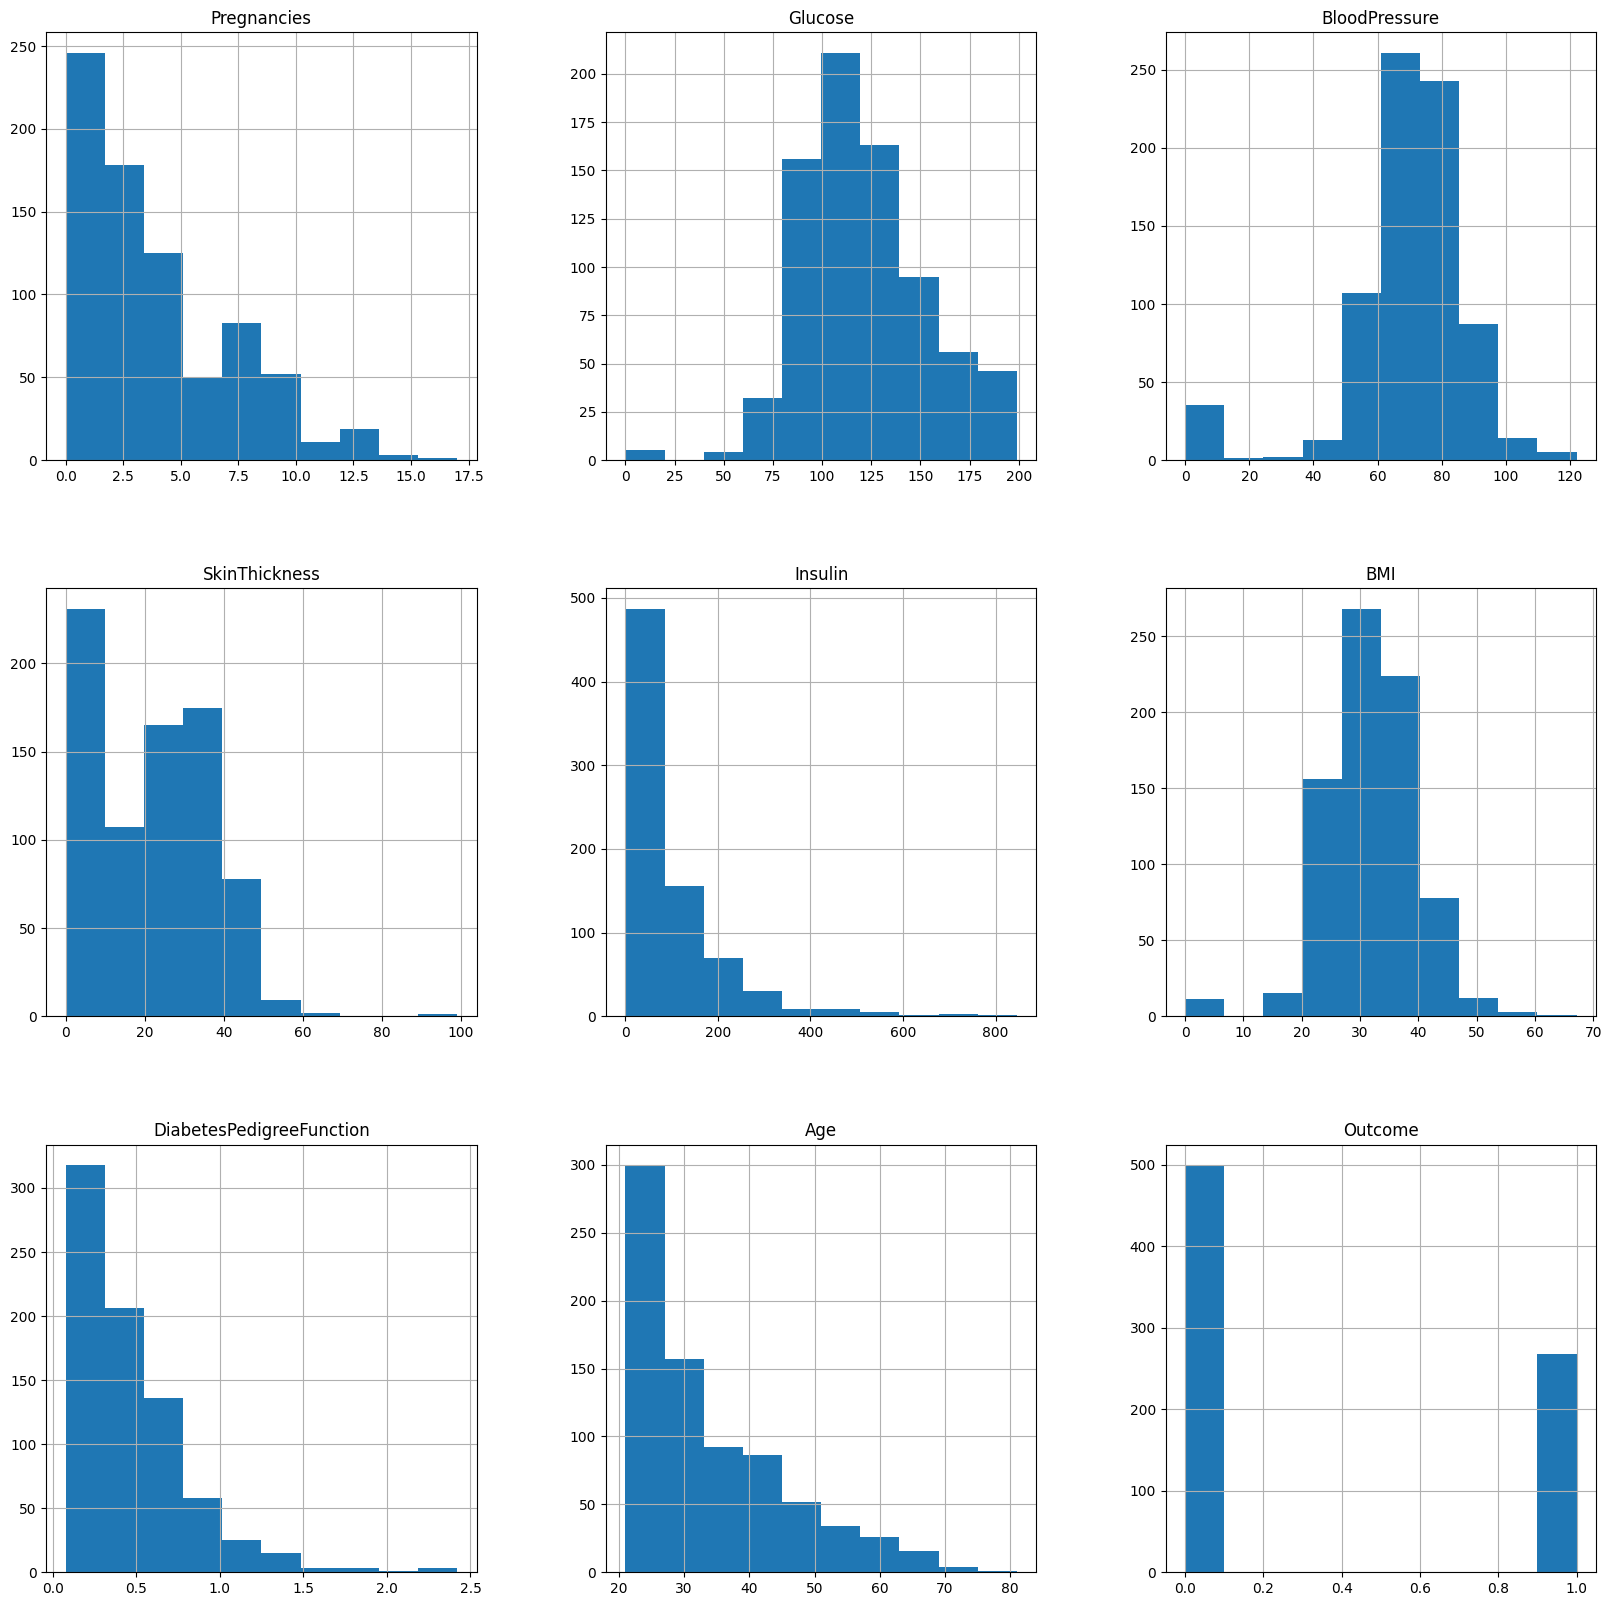

In [15]:
df.hist(figsize = (20,20))
plt.show()

Veri çerçevemizde eksik bilgi istemiyoruz. Bu verileri nasıl dolduracağımıza karar verdik. 'BloodPressure','Glucose', 'SkinThickness ', 'Insulin' ve 'BMI' değerlerini medyanlarıyla dolduruyoruz. Medyanlarıyla doldurmayı tercih etmemizin sebebi ise standart sapma ve ortalama gibi temel istatistik değerlerinde büyük oranda değişim olmadığını göstermektedir

In [16]:
df_yeni['Glucose'].fillna(df_yeni['Glucose'].median(), inplace = True)
df_yeni['BloodPressure'].fillna(df_yeni['BloodPressure'].median(), inplace = True)
df_yeni['SkinThickness'].fillna(df_yeni['SkinThickness'].median(), inplace = True)
df_yeni['Insulin'].fillna(df_yeni['Insulin'].median(), inplace = True)
df_yeni['BMI'].fillna(df_yeni['BMI'].median(), inplace = True)

Eksik verilerimizi doldurduk. Şimdi veri çerçevemizde eksik veri olup olmadığını kontrol edelim.

In [17]:
df_yeni.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Göründüğü gibi artık veri çerçevemizde eksik veri gözlenmemektedir.

Eksik veriler olmadan veri çerçevemizin temel istatistik değerlerini ve korelasyonlarını görüntüleyelim.

In [18]:
df_yeni.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Veri çerçevemizin son halinde standart sapmaların iyice azaldığını gördük. Bu bize verinin düzgün bir şekilde dağıldığını göstermektedir. Ortalama değerlerin de medyan değerlere olan yakınlığı da bunu kanıtlamaktadır.

In [19]:
df_yeni.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


Veri çerçevemizde eksik verileri doldurduğumuzda ilişkilerin yeniden değiştiği gözlenmektedir.

Veri çerçevemizde eksik bilgileri tamamladıktan sonra korelasyon matrisini ısı haritasında çizdirerek daha iyi gözlemleyelim.

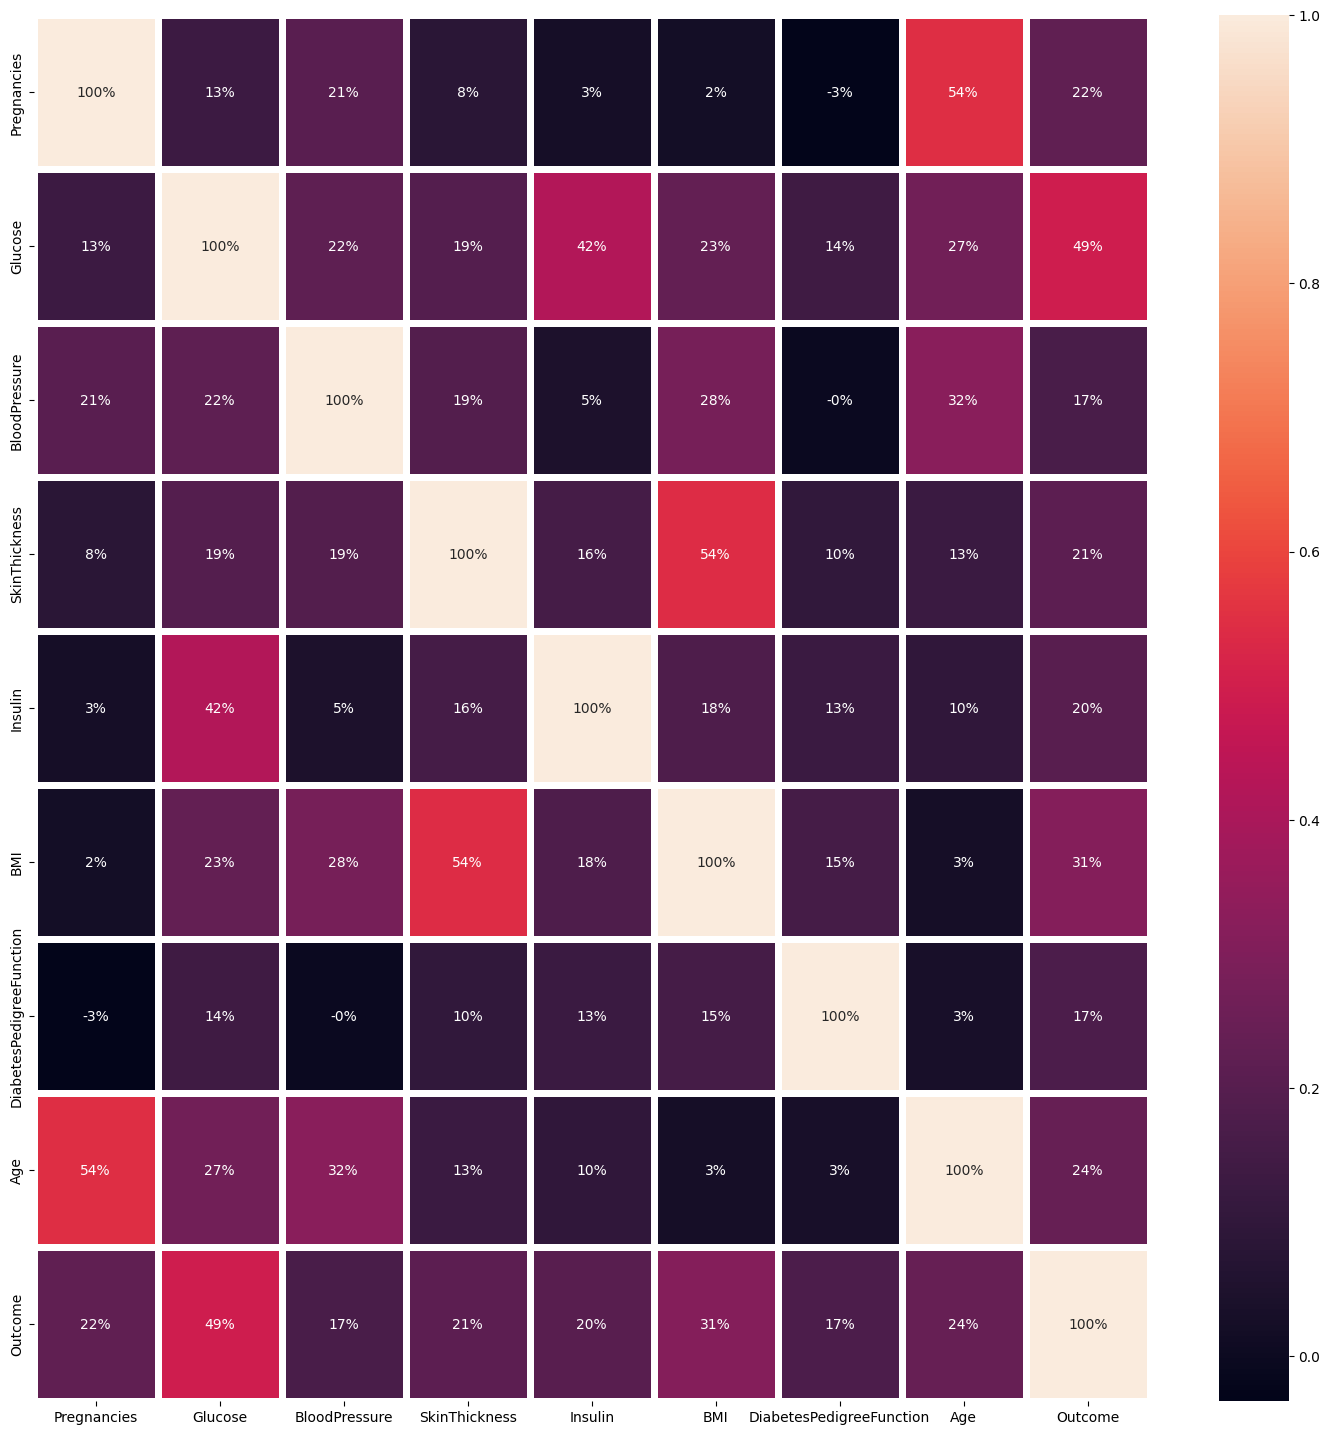

In [20]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_yeni.corr(),annot=True,linewidths=5,fmt='.0%',ax=ax)
plt.show()

Isı haritasında görüldüğü gibi 'BMI' ile 'SkinThickness' ve ' Age' ile 'Pregnancies' arasında en güçlü pozitif ilişkinin olduğu gözlenmektedir. DiabetsPedigreeFunction' ile 'Pregnancies' ile zayıf negatif ilişki gözlenmektedir.

Şimde de veri çerçevemizin son halini görselleştrirme kütüphaneleri kullanarak veri çerçevemizi daha iyi tanıyalım.

Veri çerçevemizin özniteliklerini daha iyi yorumlayabilmek için boxplot kullanalım.

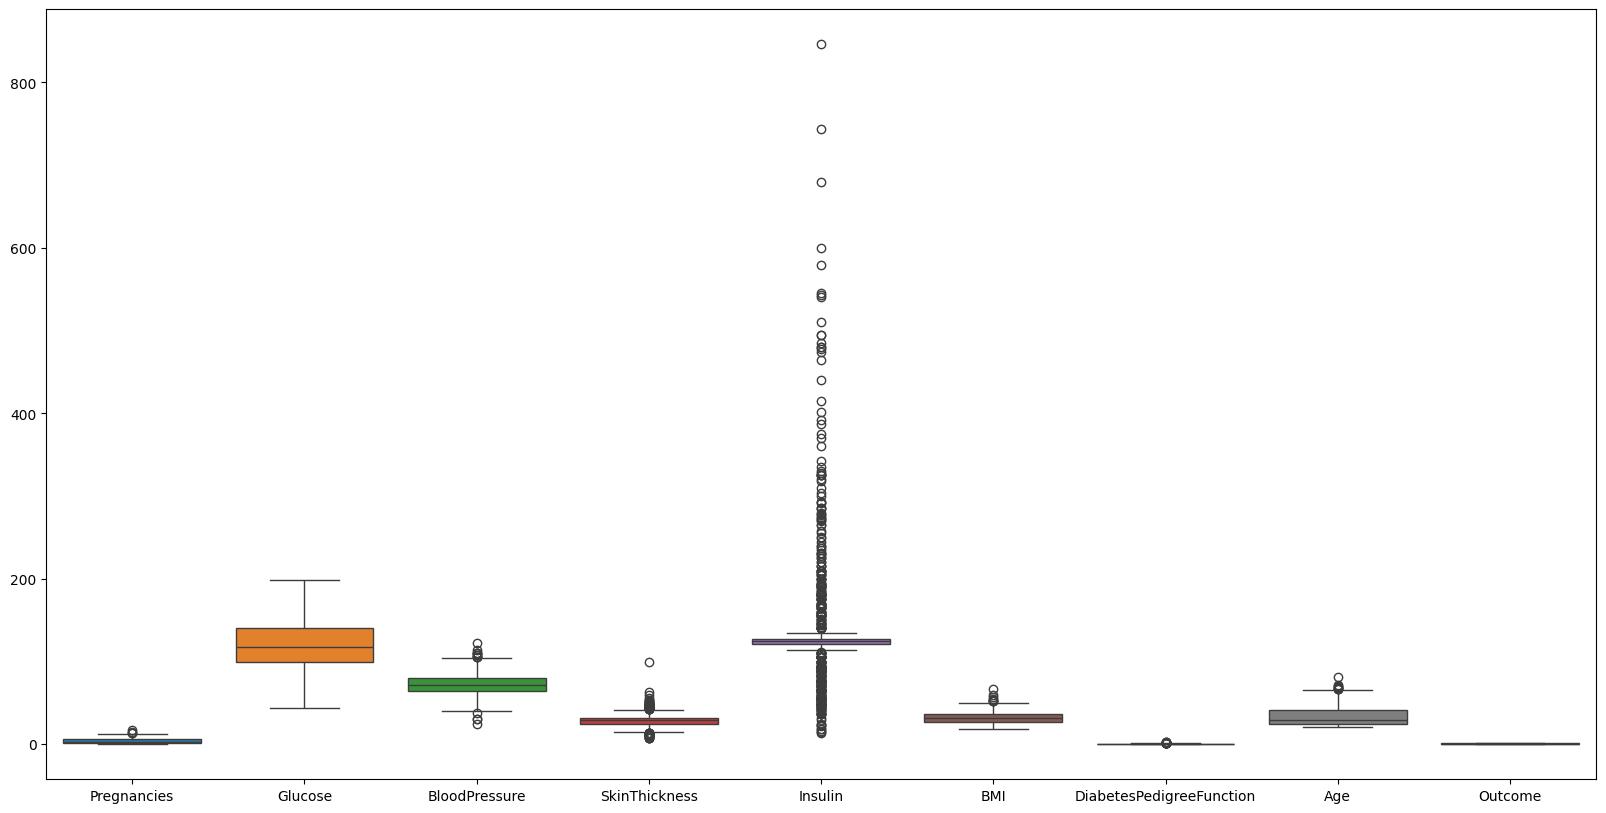

In [21]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(data=df_yeni)
plt.show()

En güçlü pozitif ilişkiye sahip olanlardan 'Age' ile 'Pregnancies' özniteliklerini scatterplot ile görüntüleyelim.

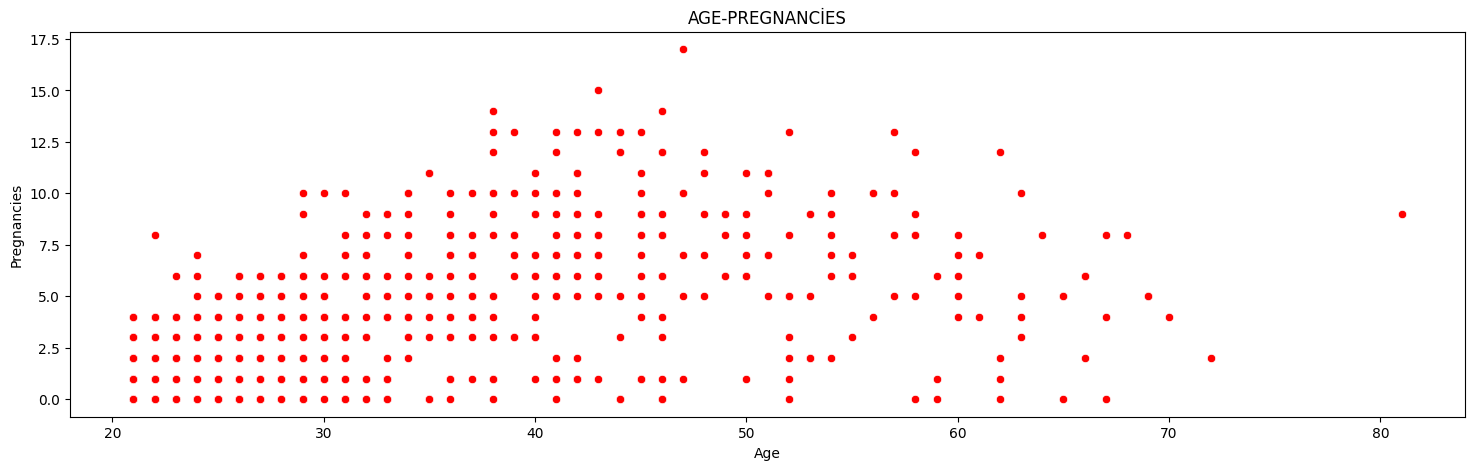

In [22]:
plt.figure(figsize=(18,5))
sns.scatterplot( x='Age', y='Pregnancies',color='red',data=df_yeni)
plt.title('AGE-PREGNANCİES')
plt.show()

Bir diğer en güçlü pozitif ilişkiye sahip olan 'SkinThicness' ile 'BMI' öznteliklerini regplot ile çizdirerek görüntüleyelim.

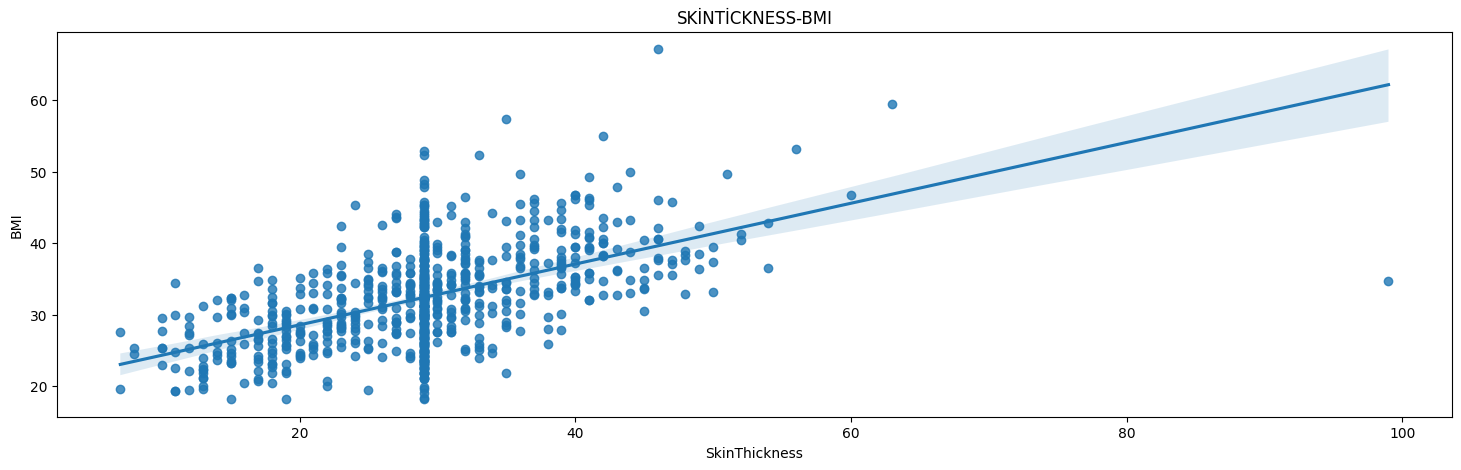

In [23]:
plt.figure(figsize=(18,5))
sns.regplot( x='SkinThickness', y='BMI',data=df_yeni)
plt.title('SKİNTİCKNESS-BMI')
plt.show()

Şimdi de negatif ilişki gözlemlenen 'DiabetsPedigreeFunction' ile 'Pregnancies' özniteliklerini lmplot ile çizdirerek görüntüleyelim. Negatif ilişki oldukça düşük gözükecektir.

<Figure size 1800x500 with 0 Axes>

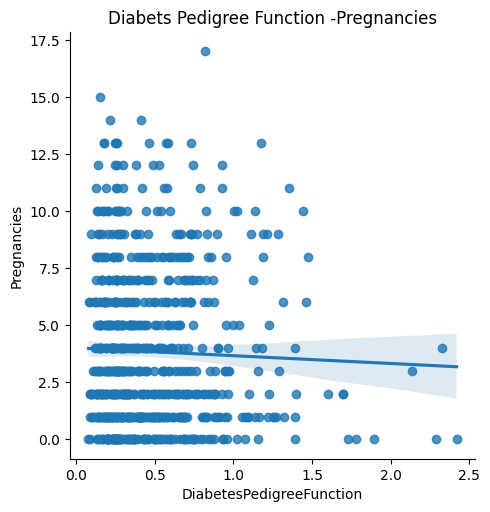

In [24]:
plt.figure(figsize=(18,5))
sns.lmplot( x= 'DiabetesPedigreeFunction', y='Pregnancies',data=df_yeni)
plt.title('Diabets Pedigree Function -Pregnancies')
plt.show()

Veri çerçevemizin en önemli özniteliği olan hedef değişkenimizin dağılımını gözlemleyelim.

In [25]:
df_yeni['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

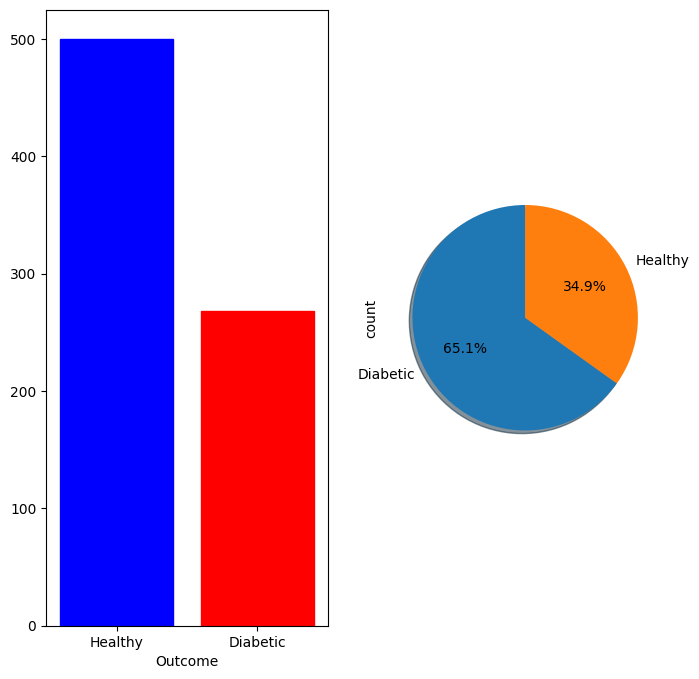

In [29]:
# Calculate the counts of each category
outcome_counts = df_yeni['Outcome'].value_counts()

# Now plot the barplot
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))
barplot = sns.barplot(y=outcome_counts.values, x=outcome_counts.index, ax=ax1[0])

# Set the color of each bar manually
barplot.patches[0].set_color('blue')
barplot.patches[1].set_color('red')

labels = 'Diabetic', 'Healthy'

df_yeni.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

Veri çerçevemizin sonucuna bakarsak %65.1'i diyabet hastası %34.9' u sağlıklı olduğu gözlenmektedir. Bu da bize veri çerçevemizin dengeli olmadığını gösteriyor. Fakat çok dengesiz de değildir yorumunu yapabiliyoruz.

Veri çerçevemize yeni bir öznitelik ekleyelim.'Age' özniteliğindeki değerleri gruplandıralım. Yaşlara göre 4 farklı hedef kitle grubu ortaya çıkartalım.

In [30]:
df_yeni['Age']=df_yeni['Age']
bins=[20,35,50,65,81]
labels=['Genç','Orta Yaş','Yetişkin','Yaşlı']
df_yeni['yas_grp']=pd.cut(df_yeni['Age'],bins,labels=labels)

Yeni oluşan veri çerçevemizin ilk 5 gözlemini görüntüleyelim.

In [31]:
df_yeni.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,yas_grp
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,Diabetic,Orta Yaş
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,Healthy,Genç
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,Diabetic,Genç
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy,Genç
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Diabetic,Genç


Yaş gruplarımızda kaçar kişinin olduğunu görüntüleyelim.

In [32]:
df_yeni.yas_grp.value_counts()

yas_grp
Genç        498
Orta Yaş    189
Yetişkin     68
Yaşlı        13
Name: count, dtype: int64

Yaş gruplarımızı görselleştirelim.

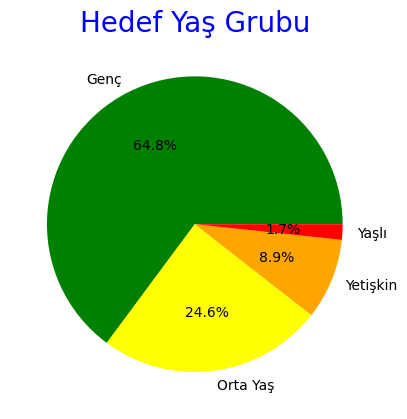

In [33]:
colors = ['green','yellow','orange','red']
labels = df_yeni.yas_grp.value_counts().index
plt.title('Hedef Yaş Grubu',color = 'blue',fontsize = 20)
plt.pie(df_yeni.yas_grp.value_counts(),colors=colors,autopct='%1.1f%%',labels=labels)
plt.show()